# Classification of flowers based on iris length of petals and sepals using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv("IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

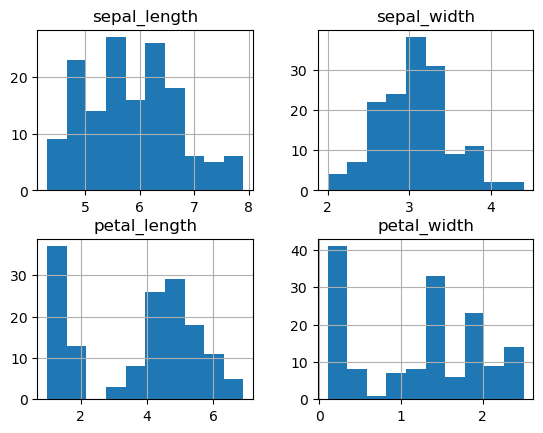

In [8]:
data.hist()
plt.show();

In [9]:
from warnings import filterwarnings
filterwarnings(action='ignore')

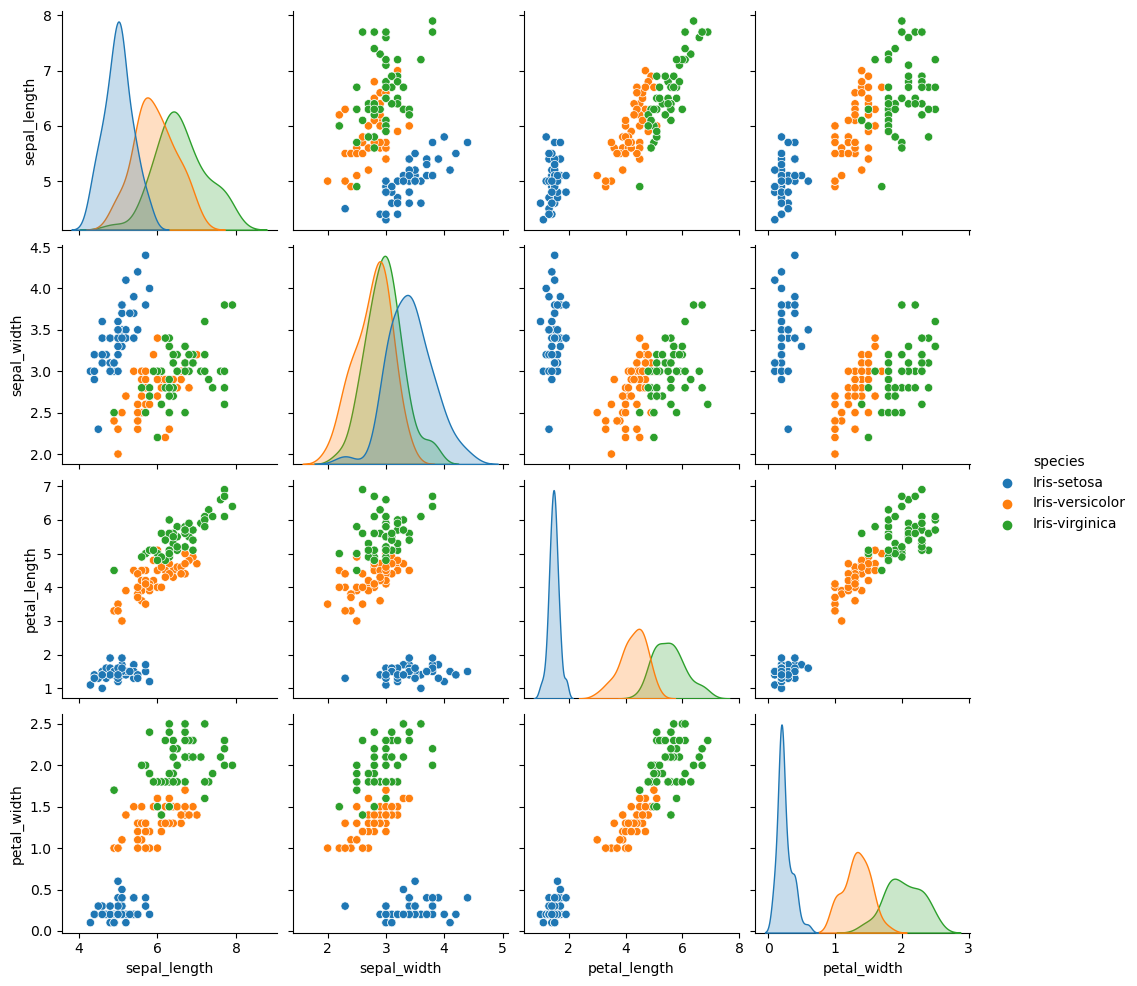

In [10]:
sns.pairplot(data, hue='species');

<Axes: xlabel='species', ylabel='petal_width'>

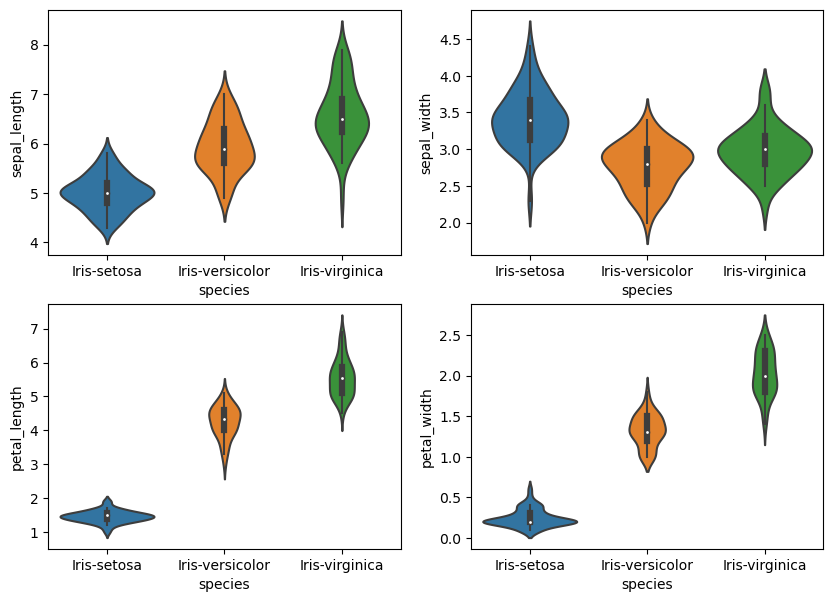

In [11]:
plt.figure(figsize=(10, 7))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=data)

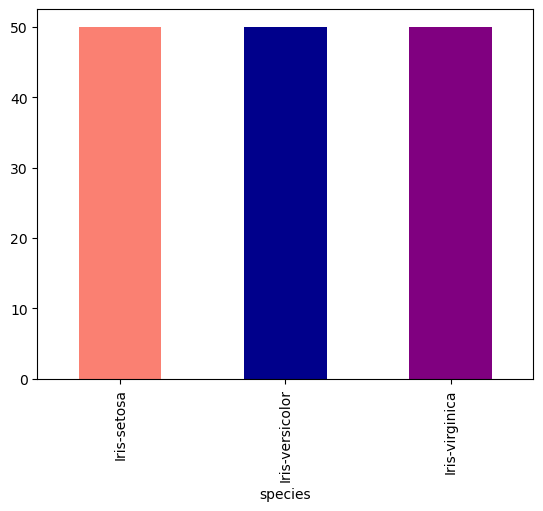

In [12]:
data["species"].value_counts().plot(kind="bar", color=["salmon", "darkblue", "purple"]);

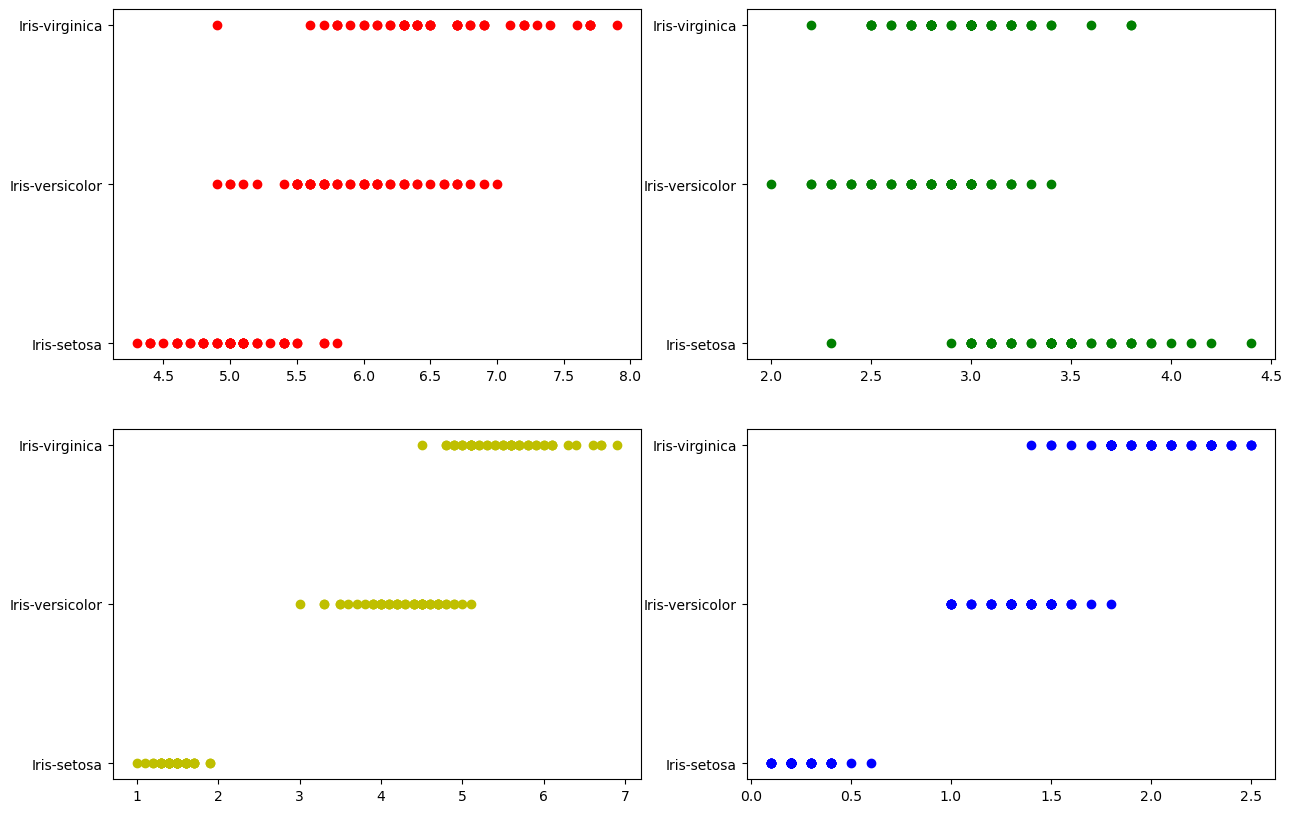

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(data["sepal_length"], data["species"], color='r')
plt.subplot(2,2,2)
plt.scatter(data["sepal_width"], data["species"], color='g')
plt.subplot(2,2,3)
plt.scatter(data["petal_length"], data["species"], color='y')
plt.subplot(2,2,4)
plt.scatter(data["petal_width"], data["species"], color='b')

In [14]:
 from sklearn import preprocessing 
   
label_encoder = preprocessing.LabelEncoder() 
data["species"]= label_encoder.fit_transform(data["species"]) 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [16]:
data["species"].unique()

array([0, 1, 2])

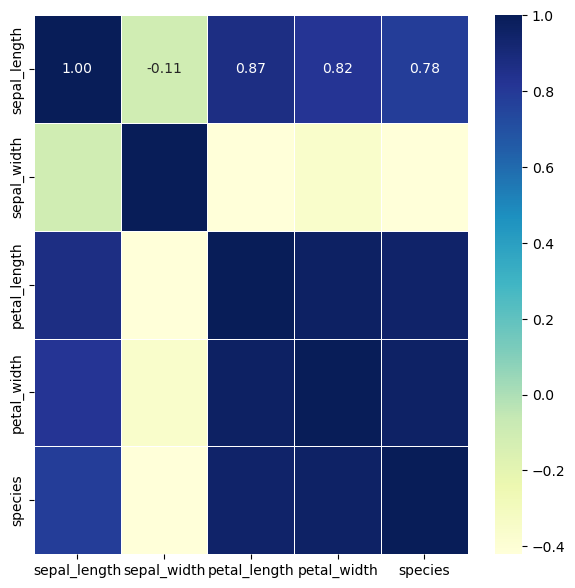

In [17]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [18]:
X = data.drop('species', axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y = data['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic Regresssion": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}


def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models: a dict of different Scikit-learn machine learning models
  X_train: training data(no labels)
  X_test: testing data (no labels)
  y_train: tarining labels
  y_test: test labels
  """
  np.random.seed(42)
  model_scores = {}
  for model_name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[model_name] = model.score(X_test, y_test)
  return model_scores

In [22]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regresssion': 1.0, 'KNN': 1.0, 'Random Forest': 1.0}

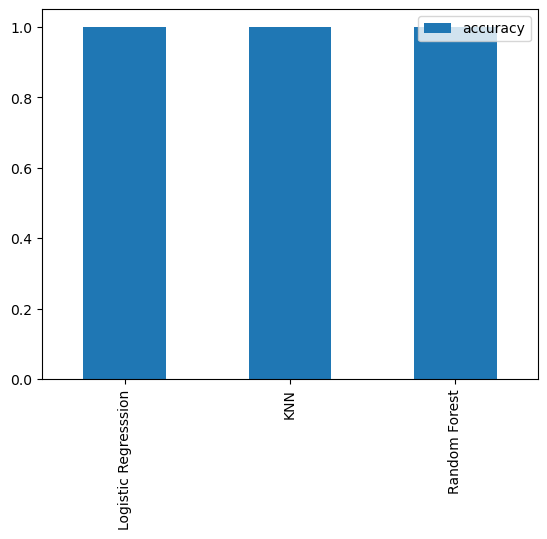

In [23]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [24]:
for model_name, model in models.items():
    y_preds = model.predict(X_test)
y_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

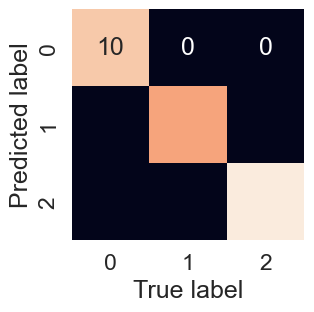

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
  """
  Plots a nice looking confusion matrix using seaborn's heatmap
  """
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

In [27]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

